# Principal Component Analysis

## import library

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [184]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

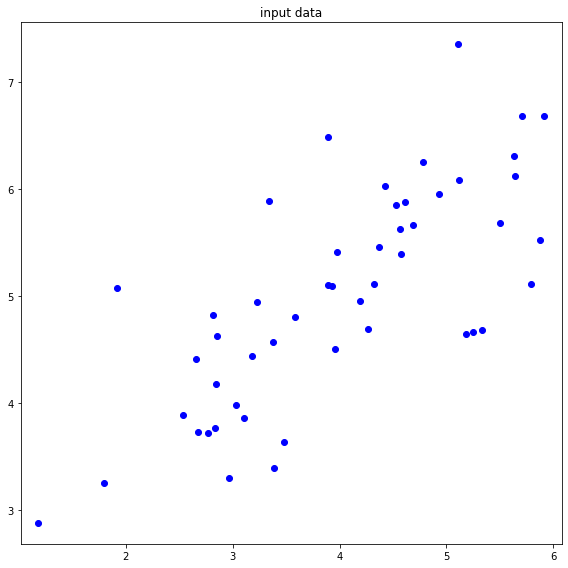

In [185]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================

plt.scatter(x,y, c="b", marker="o")

plt.axis('equal')

# ===================================================
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  3.989265199999999
mean of y =  5.002806
std of x =  1.161260585149156
std of y =  1.0131222834742113


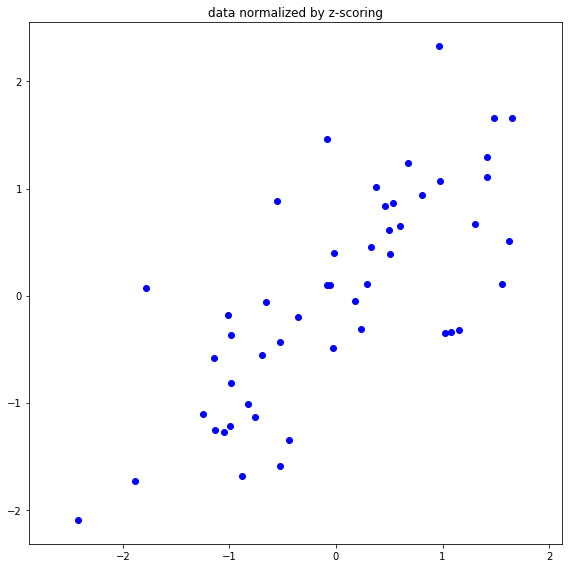

In [186]:
avg = feature.sum(axis=0)/number_data 
print('mean of x = ',avg[0])
print('mean of y = ',avg[1])

std = np.std(feature,axis=0)
print('std of x = ',std[0])
print('std of y = ',std[1])

Zfeature[:,0] = (x-avg[0])/std[0]
Zfeature[:,1] = (y-avg[1])/std[1]

def plot_data(Zfeature):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    # ===================================================
    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_data(Zfeature)

## compute covariance matrix

In [187]:
def compute_covariance(feature):
    # ===================================================
    Sigma = (feature.T@feature)/number_data
    # ===================================================
    return Sigma

## compute principal directions

In [188]:
def compute_eigen(X):
    # ===================================================
    u, U = np.linalg.eig(X)
    S = np.identity(number_feature)
    for i in range(number_feature):
        S[i][i] = u[i]
    # ===================================================
    return S, U

In [189]:
covariance = compute_covariance(Zfeature)
print(covariance)
S,U = compute_eigen(covariance)
print(S)
print(U)

[[1.      0.73553]
 [0.73553 1.     ]]
[[1.73553 0.     ]
 [0.      0.26447]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


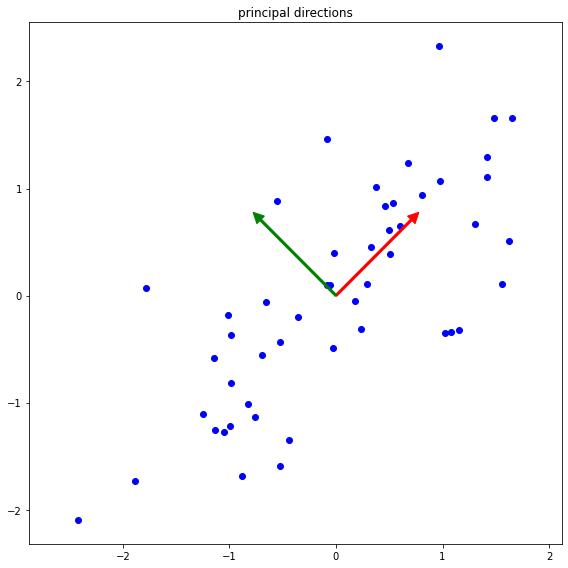

In [190]:
def plot_principal_directions(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    # ===================================================
    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.arrow( 0, 0, U[0][0], U[1][0],width=0.02, head_width = 0.1, head_length = 0.1, color = 'red')
    plt.arrow(0, 0, U[0][1], U[1][1],width=0.02, head_width = 0.1, head_length = 0.1, color = 'green')

    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_principal_directions(Zfeature,U)

## first principal axis

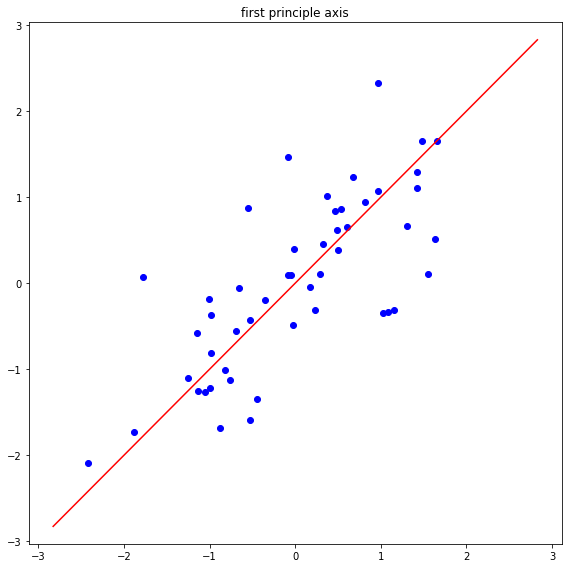

In [191]:
def plot_first_principle_axis(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    # ===================================================
    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.plot([ -4*U[0][0],4*U[0][0]],[-4*U[1][0], 4*U[1][0]], color = 'red')

    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_first_principle_axis(Zfeature,U)

## second principal axis

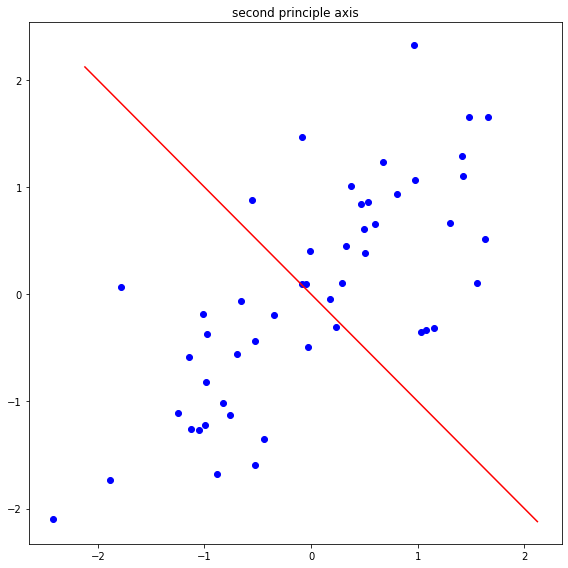

In [192]:
def plot_second_principle_axis(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    # ===================================================
    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.plot([ -3*U[0][1],3*U[0][1]],[-3*U[1][1],3*U[1][1]], color = 'red')

    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_second_principle_axis(Zfeature,U)

## compute the projection of point onto the line

In [193]:
def compute_projection_onto_line(feature, vector):
    # ===================================================
    t_v = feature@vector.reshape(2,1)
    projection = t_v@vector.reshape(1,2)
    # ===================================================
    return projection

## projcet to the first principal axis

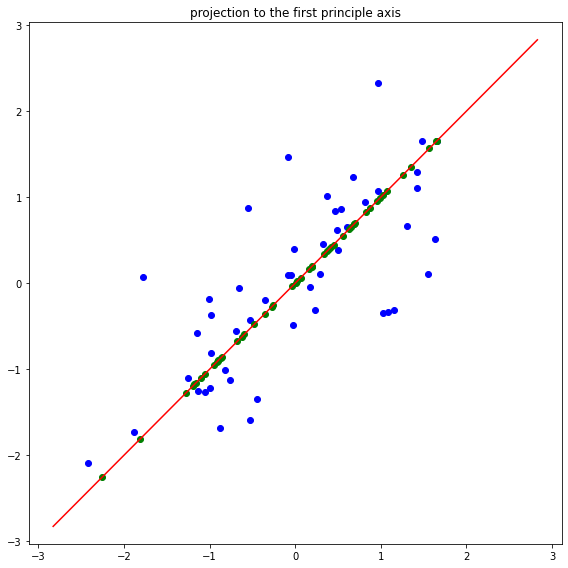

In [194]:
def plot_projection_first(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    projection = compute_projection_onto_line(Zfeature,U[:,0])

    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.plot([ -4*U[0][0],4*U[0][0]],[-4*U[1][0], 4*U[1][0]], color = 'red')

    plt.scatter(projection[:,0],projection[:,1], c="g", marker="o")


    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_projection_first(Zfeature,U)

## projcet to the second principal axis

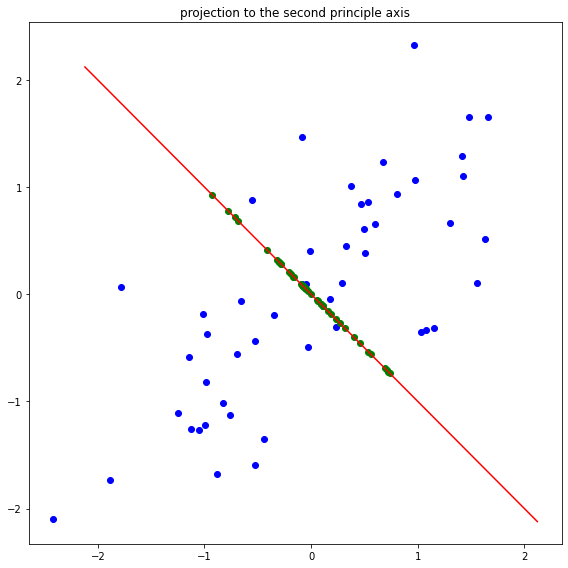

In [195]:
def plot_projection_second(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    projection = compute_projection_onto_line(Zfeature,U[:,1])

    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.plot([ -3*U[0][1],3*U[0][1]],[-3*U[1][1], 3*U[1][1]], color = 'red')

    plt.scatter(projection[:,0],projection[:,1], c="g", marker="o")


    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_projection_second(Zfeature,U)

## connect original data to the projection onto the first principal axis

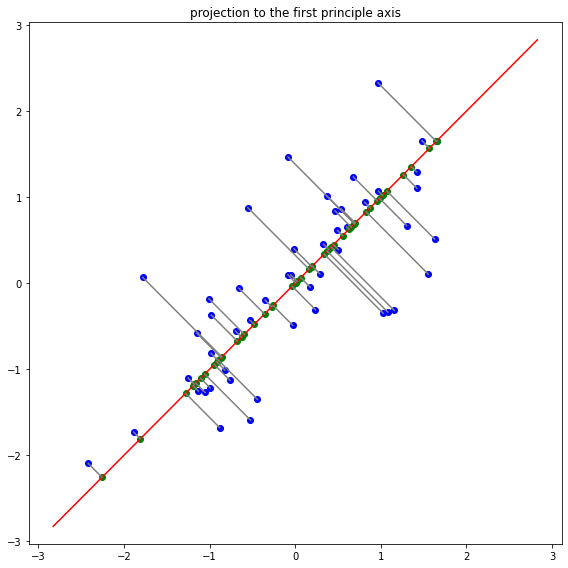

In [196]:
def plot_projection_first_line(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    projection = compute_projection_onto_line(Zfeature,U[:,0])

    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.plot([ -4*U[0][0],4*U[0][0]],[-4*U[1][0], 4*U[1][0]], color = 'red')

    plt.scatter(projection[:,0],projection[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([Zfeature[i,0],projection[i,0]],[Zfeature[i,1],projection[i,1]], color = 'gray') 

    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_projection_first_line(Zfeature,U)

## connect original data to the projection onto the second principal axis

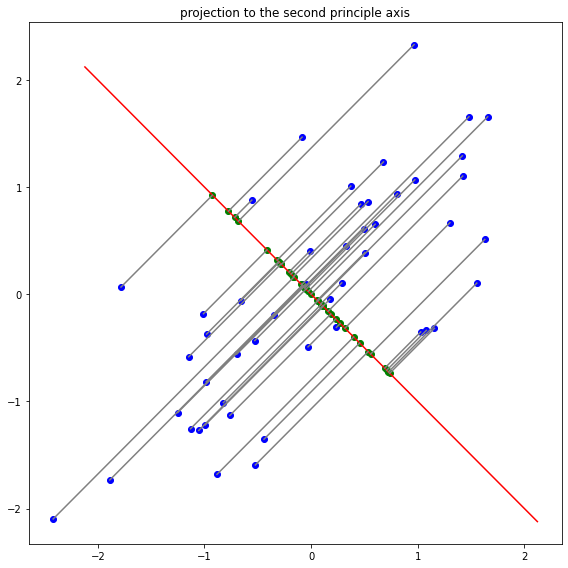

In [197]:
def plot_projection_second_line(Zfeature,U):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    projection = compute_projection_onto_line(Zfeature,U[:,1])

    plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker="o")

    plt.plot([ -3*U[0][1],3*U[0][1]],[-3*U[1][1], 3*U[1][1]], color = 'red')

    plt.scatter(projection[:,0],projection[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([Zfeature[i,0],projection[i,0]],[Zfeature[i,1],projection[i,1]], color = 'gray') 

    plt.axis('equal')
    # ===================================================
    plt.tight_layout()
    plt.show()
plot_projection_second_line(Zfeature,U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

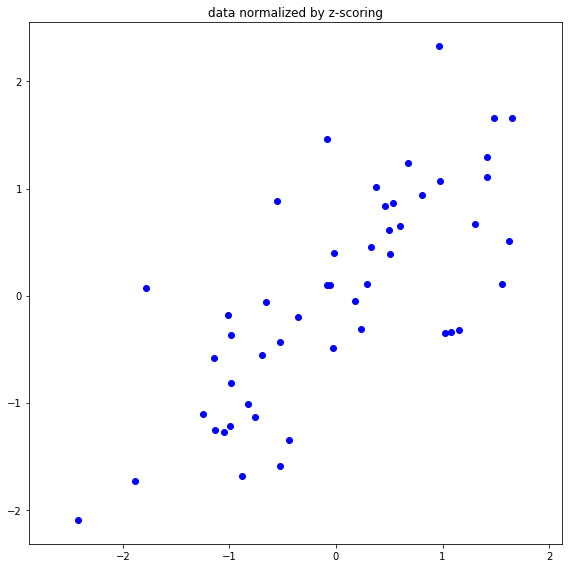

In [198]:
plot_data(Zfeature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

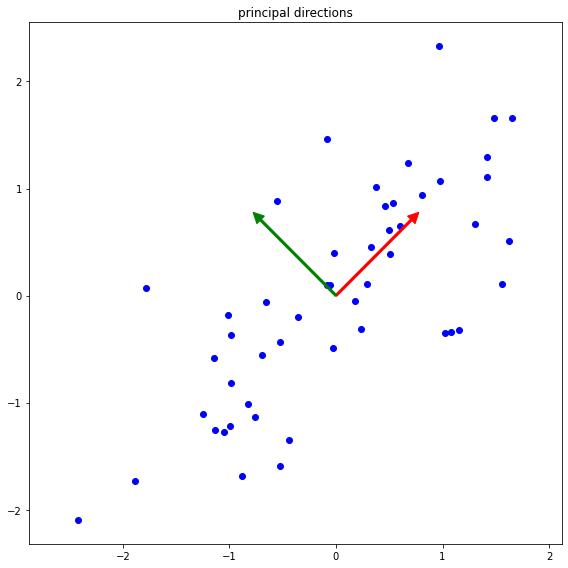

In [199]:
plot_principal_directions(Zfeature,U)

***

### 3. plot the first principal axis in red on the normalized data in blue

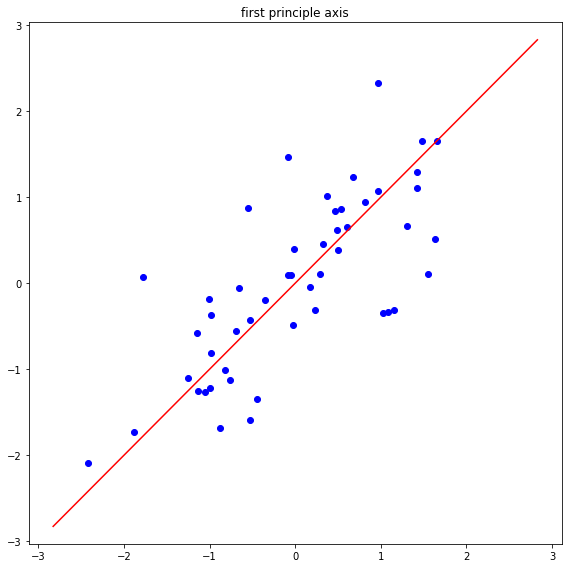

In [200]:
plot_first_principle_axis(Zfeature,U)

***

### 4. plot the second principal axis in red on the normalized data in blue

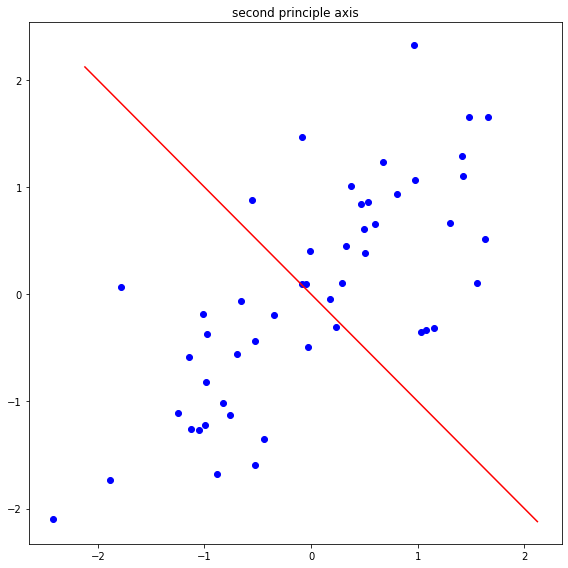

In [201]:
plot_second_principle_axis(Zfeature,U)

***

### 5. plot the projection of data in green onto the first principal axis in red

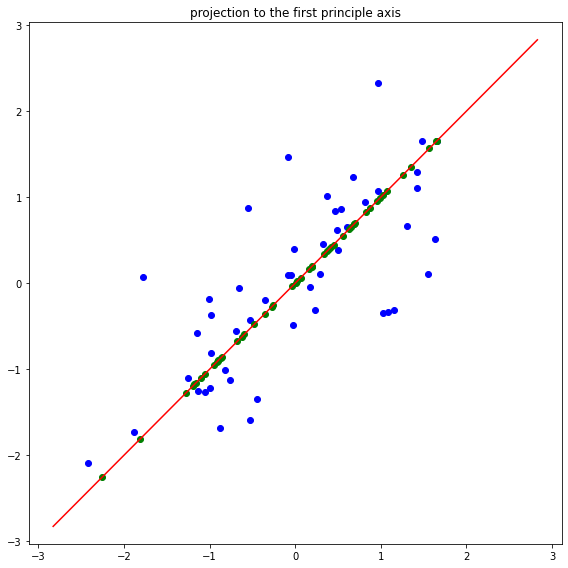

In [202]:
plot_projection_first(Zfeature,U)

***

### 6. plot the projection of data in green onto the second principal axis in red

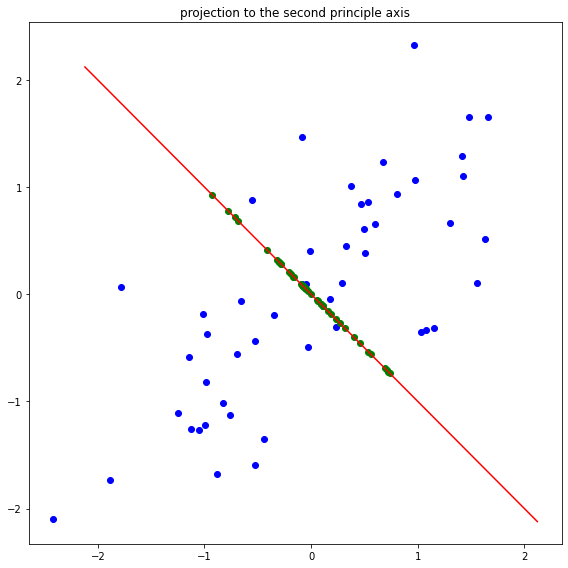

In [203]:
plot_projection_second(Zfeature,U)

***

### 7. plot the projection line in grey onto the first principal axis

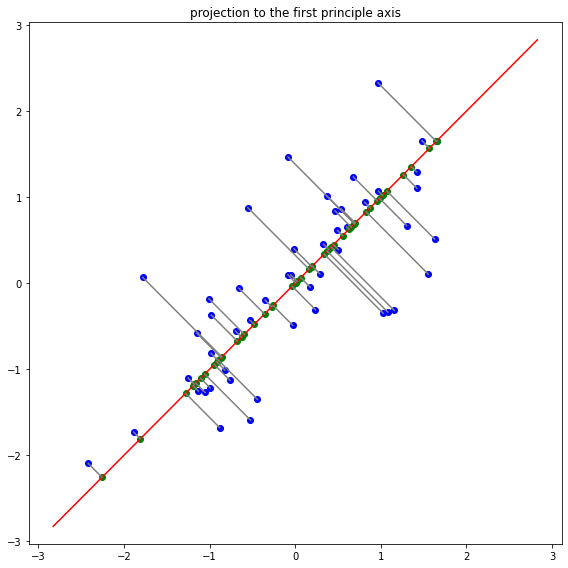

In [204]:
plot_projection_first_line(Zfeature,U)

***

### 8. plot the projection line in grey onto the second principal axis

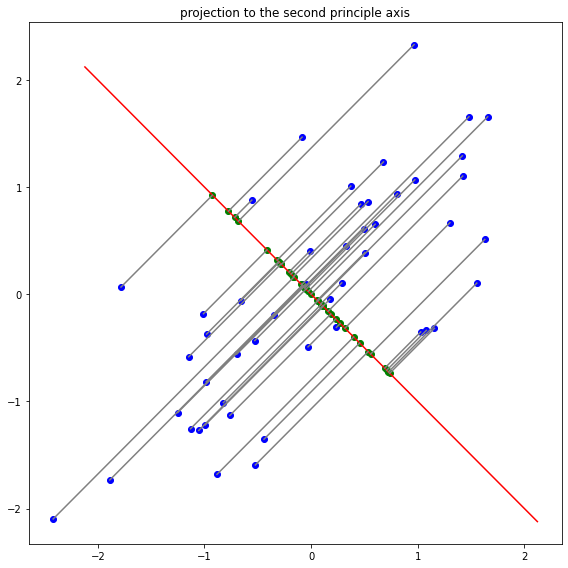

In [205]:
plot_projection_second_line(Zfeature,U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***